<a href="https://colab.research.google.com/github/Vamarinpe/PAE/blob/master/CodRecurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Por agente

# importa la librería
import pandas as pd
import numpy as np
pd.set_option('display.notebook_repr_html', False)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import csv

Datos = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/Recurso.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Fecha","Codigo Agente","Recurso"],
    usecols=["Fecha","Codigo Agente","Recurso","Precio Oferta Ideal"],      # Datosnuevo=Datos[['Fecha','Codigo Agente','Recurso']]  - otra forma
    parse_dates=["Fecha"],
    dayfirst=True)

# VISUALIZACIÓN DATOS

In [0]:
# verificar lectura
len(Datos)
Datos.columns
Datos.describe()
Datos.head(60)
Datos.count()

In [0]:
# contando registros con groupby
Datos.groupby('Codigo Agente')['Precio Oferta Ideal'].count()
Datos.groupby('Recurso')['Precio Oferta Ideal'].count()
Datos.groupby('Fecha')['Precio Oferta Ideal'].count()            # también sin el ['Precio Oferta Ideal']
#Datos.groupby('Codigo Agente').count()

In [0]:
# muestra con loc, debe decir los indices especificos, de mayor a menor
Datos.loc[('2012-09-04')]
Datos.loc[('2012-09-04','EPMG')]
plt.plot(Datos.loc[('2017-09-05','EPMG')])
plt.plot(Datos.loc[('2017-09-06','EPMG')])
plt.plot(Datos.loc[('2019-08-31','EPMG')])
plt.show()
#Datos.loc['2012-01-01':'2013-12-31']                         # también funciona para rangos

In [0]:
# muestra con iloc, encuentra el dato que le digo en numero
Datos.iloc[-2:]

In [0]:
# muestra con xs, filtra y muestra todo lo del nivel especifico indicado, muestra lo de los demás indices
Datos.xs('2012-06-08',level='Fecha')
Datos.xs('EPMG',level='Codigo Agente')
Datos.xs('GUATAPE',level='Recurso').plot()
Datos.xs('PLAYAS',level='Recurso').plot()
plt.rcParams["figure.figsize"] = (20,8)

Datos.xs('GUATAPE',level='Recurso')

In [0]:
p=Datos.loc['2012-01-01':'2018-08-31']
p.xs('TEBSAB',level='Recurso').plot()                      # grafica de cierto recurso en cierto tiempo
plt.rcParams["figure.figsize"] = (20,8)

# IDENTIFICAR RECURSOS REPRESENTATIVOS

In [0]:
# agrega columna con el combustible
Combustible = pd.read_csv(
    "https://raw.githubusercontent.com/Vamarinpe/PAE/master/Listado_Recursos_Generacion.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Nombre Recurso"],
    usecols=["Nombre Recurso","Combustible Por Defecto"])      # Datosnuevo=Datos[['Fecha','Codigo Agente','Recurso']]  - otra forma

Datos['Combustible']=Datos.index.get_level_values('Recurso').map(Combustible['Combustible Por Defecto'])

In [0]:
# funcion para obtener los recursos de más capacidad en cada año (10 primeros)
def capacidad(x):
  Cap = pd.read_csv(
    x,
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Recurso"],
    usecols=["Recurso","Capacidad Efectiva Neta kW","Combustible por defecto"])
  return Cap.sort_values(by='Capacidad Efectiva Neta kW',ascending=False).drop_duplicates().head(10)

def capacidad1(x):
  Cap = pd.read_csv(
    x,
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.',
    index_col=["Recurso"],
    usecols=["Recurso","Capacidad Efectiva Neta","Combustible por defecto"])
  return Cap.sort_values(by='Capacidad Efectiva Neta',ascending=False).drop_duplicates().head(10)

C2000=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2000.csv")
C2001=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2001.csv")
C2002=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2002.csv")
C2003=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2003.csv")
C2004=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2004.csv")
C2005=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2005.csv")
C2006=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2006.csv")
C2007=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2007.csv")
C2008=capacidad1("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2008.csv")
C2009=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2009.csv")
C2010=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2010.csv")
C2011=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2011.csv")
C2012=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2012.csv")
C2013=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2013.csv")
C2014=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2014.csv")
C2015=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2015.csv")
C2016=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2016.csv")
C2017=capacidad("https://raw.githubusercontent.com/Vamarinpe/PAE/master/Capacidad_Efectiva_Neta_(kW)_2017.csv")


In [0]:
# filtra Datos y muestra solo los que tienen mayor capacidad
#2000
Datos2000=Datos.loc['2000']
NuevaDatos2000=Datos2000[Datos2000.index.get_level_values('Recurso').isin(list(C2000.index))]
#2001
Datos2001=Datos.loc['2001']
NuevaDatos2001=Datos2001[Datos2001.index.get_level_values('Recurso').isin(list(C2001.index))]
#2002
Datos2002=Datos.loc['2002']
NuevaDatos2002=Datos2002[Datos2002.index.get_level_values('Recurso').isin(list(C2002.index))]
#2003
Datos2003=Datos.loc['2003']
NuevaDatos2003=Datos2003[Datos2003.index.get_level_values('Recurso').isin(list(C2003.index))]
#2004
Datos2004=Datos.loc['2004']
NuevaDatos2004=Datos2004[Datos2004.index.get_level_values('Recurso').isin(list(C2004.index))]
#2005
Datos2005=Datos.loc['2005']
NuevaDatos2005=Datos2005[Datos2005.index.get_level_values('Recurso').isin(list(C2005.index))]
#2006
Datos2006=Datos.loc['2006']
NuevaDatos2006=Datos2006[Datos2006.index.get_level_values('Recurso').isin(list(C2006.index))]
#2007
Datos2007=Datos.loc['2007']
NuevaDatos2007=Datos2007[Datos2007.index.get_level_values('Recurso').isin(list(C2007.index))]
#2008
Datos2008=Datos.loc['2008']
NuevaDatos2008=Datos2008[Datos2008.index.get_level_values('Recurso').isin(list(C2008.index))]
#2009
Datos2009=Datos.loc['2009']
NuevaDatos2009=Datos2009[Datos2009.index.get_level_values('Recurso').isin(list(C2009.index))]
#2010
Datos2010=Datos.loc['2010']
NuevaDatos2010=Datos2010[Datos2010.index.get_level_values('Recurso').isin(list(C2010.index))]
#2011
Datos2011=Datos.loc['2011']
NuevaDatos2011=Datos2011[Datos2011.index.get_level_values('Recurso').isin(list(C2011.index))]
#2012
Datos2012=Datos.loc['2012']
NuevaDatos2012=Datos2012[Datos2012.index.get_level_values('Recurso').isin(list(C2012.index))]
#2013
Datos2013=Datos.loc['2013']
NuevaDatos2013=Datos2013[Datos2013.index.get_level_values('Recurso').isin(list(C2013.index))]
#2014
Datos2014=Datos.loc['2014']
NuevaDatos2014=Datos2014[Datos2014.index.get_level_values('Recurso').isin(list(C2014.index))]
#2015
Datos2015=Datos.loc['2015']
NuevaDatos2015=Datos2015[Datos2015.index.get_level_values('Recurso').isin(list(C2015.index))]
#2008
Datos2016=Datos.loc['2016']
NuevaDatos2016=Datos2016[Datos2016.index.get_level_values('Recurso').isin(list(C2016.index))]
#20017
Datos2017=Datos.loc['2017']
NuevaDatos2017=Datos2017[Datos2017.index.get_level_values('Recurso').isin(list(C2017.index))]

Datos_filtrado=pd.concat([NuevaDatos2000,NuevaDatos2001,NuevaDatos2002,NuevaDatos2003,NuevaDatos2004,NuevaDatos2005,NuevaDatos2006,NuevaDatos2007,NuevaDatos2008,
                          NuevaDatos2009,NuevaDatos2010,NuevaDatos2011,NuevaDatos2012,NuevaDatos2013,NuevaDatos2014,NuevaDatos2015,NuevaDatos2016,NuevaDatos2017,])
Datos_filtrado

                                     Precio Oferta Ideal Combustible
Fecha      Codigo Agente Recurso                                    
2000-01-01 CHBG          BETANIA                   44.95        AGUA
           EMGG          CASALCO                   49.70        AGUA
           CHVG          CHIVOR                    48.37        AGUA
           EPMG          GUATAPE                   25.59        AGUA
                         GUATRON                   58.28        AGUA
...                                                  ...         ...
2017-12-31 ENDG          PAGUA                    169.24        AGUA
           EPMG          PORCE III                129.24        AGUA
           ISGG          SAN CARLOS               150.24        AGUA
                         SOGAMOSO                 174.24        AGUA
           TBSG          TEBSAB                   381.13         GAS

[58852 rows x 2 columns]

In [0]:
# cuenta de esos primeros, que combustible usan
Datos_filtrado.groupby('Combustible').count()
Datos_filtrado['Combustible']                # muestra la columna
Datos_filtrado.index.names[2]                            # muestra nombre index 2
a=Datos_filtrado.index.get_level_values('Recurso').drop_duplicates()       # muestra los datos de un indice
print(a)

a.map(Combustible['Combustible Por Defecto'])

Index(['BETANIA', 'CASALCO', 'CHIVOR', 'GUATAPE', 'GUATRON', 'GUAVIO', 'PAGUA',
       'SAN CARLOS', 'TEBSAB', 'ALBAN', 'TERMOSIERRAB', 'PORCE III',
       'SOGAMOSO'],
      dtype='object', name='Recurso')


Index(['AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'AGUA', 'GAS',
       'AGUA', 'ACPM', 'AGUA', 'AGUA'],
      dtype='object', name='Recurso')

#MODELOS

# MODELO ARIMA PARA BETANIA

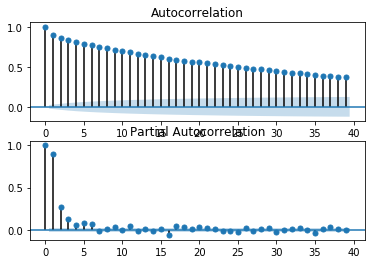

mean1=124.534275, mean2=188.375456
variance1=35631.679756, variance2=48755.339585


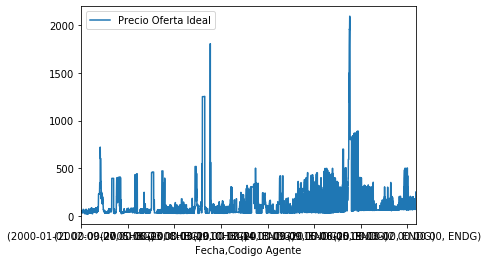

In [2]:
# SERIE NORMAL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
%matplotlib inline

M1Betania=Datos.xs('BETANIA',level='Recurso')                # Quita las ultimas 718 (6465)

pyplot.figure()
pyplot.subplot(211)
plot_acf(M1Betania, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(M1Betania, ax=pyplot.gca())
pyplot.show()

M1Betania.plot()

X = M1Betania['Precio Oferta Ideal'].values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(prueba, model='multiplicative', freq=365)
#result.plot()
#pyplot.show()

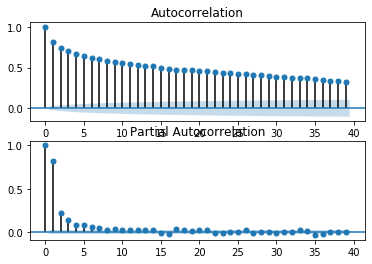

mean1=4.331325, mean2=4.775806
variance1=0.726766, variance2=0.884310


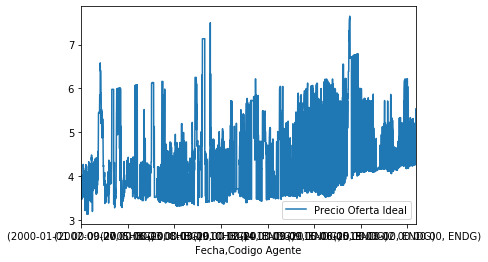

In [3]:
# TRANSFORMACION LOGARITMO PARA ESTABILIZAR VARIANZA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

M1BetaniaLog=np.log(M1Betania)

pyplot.figure()
pyplot.subplot(211)
plot_acf(M1BetaniaLog, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(M1BetaniaLog, ax=pyplot.gca())
pyplot.show()

M1BetaniaLog.plot()

X = M1BetaniaLog['Precio Oferta Ideal'].values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

In [0]:
# PRIMERA DIFERENCIACIÓN PARA VOLVER ESTACIONAL
M1BetaniaLogDif=M1BetaniaLog.diff()
M1BetaniaLogDif=M1BetaniaLogDif[1:]

pyplot.figure()
pyplot.subplot(211)
plot_acf(M1BetaniaLogDif, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(M1BetaniaLogDif, ax=pyplot.gca())
pyplot.show()

M1BetaniaLogDif.plot()

In [5]:
% pip install pyramid-arima
from pyramid.arima import auto_arima
stepwise_model = auto_arima(M1BetaniaLog, start_p=0, start_q=0,
                           max_p=3, max_q=3, seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a pac

Fit ARIMA: order=(0, 1, 0); AIC=12059.142, BIC=12072.900, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=11422.195, BIC=11442.833, Fit time=0.052 seconds
Fit ARIMA: order=(0, 1, 1); AIC=11052.351, BIC=11072.989, Fit time=0.057 seconds
Fit ARIMA: order=(1, 1, 1); AIC=10754.020, BIC=10781.537, Fit time=1.761 seconds
Fit ARIMA: order=(1, 1, 2); AIC=10727.498, BIC=10761.895, Fit time=2.125 seconds
Fit ARIMA: order=(2, 1, 3); AIC=10676.744, BIC=10724.899, Fit time=6.386 seconds
Fit ARIMA: order=(1, 1, 3); AIC=10715.363, BIC=10756.639, Fit time=2.715 seconds
Fit ARIMA: order=(3, 1, 3); AIC=10685.273, BIC=10740.308, Fit time=6.275 seconds
Fit ARIMA: order=(2, 1, 2); AIC=10678.106, BIC=10719.382, Fit time=4.991 seconds
Total fit time: 24.378 seconds
10676.743713195025


In [6]:
train = M1BetaniaLog.iloc[:6465]
test = M1BetaniaLog.iloc[6465:]

stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

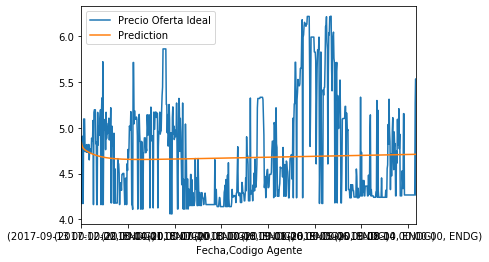

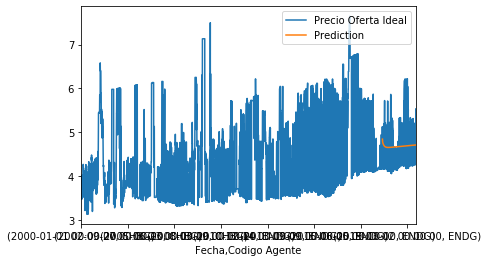

In [7]:
future_forecast = stepwise_model.predict(n_periods=718)

future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

pd.concat([M1BetaniaLog,future_forecast],axis=1).plot()

# MODELO ARIMA PARA TEBSAB

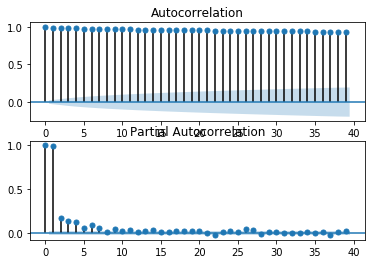

mean1=107.254142, mean2=246.815137
variance1=1185.609724, variance2=11829.478864


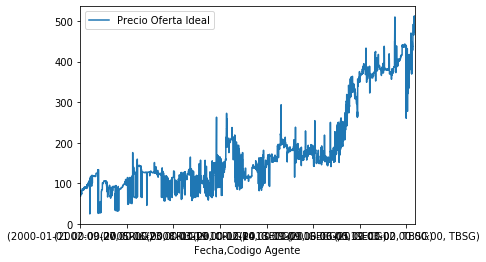

In [28]:
# SERIE NORMAL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
%matplotlib inline

M1Tebsab=Datos.xs('TEBSAB',level='Recurso')                # Quita las ultimas 718 (6465)

pyplot.figure()
pyplot.subplot(211)
plot_acf(M1Tebsab, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(M1Tebsab, ax=pyplot.gca())
pyplot.show()

M1Tebsab.plot()

X = M1Tebsab['Precio Oferta Ideal'].values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


#from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(prueba, model='multiplicative', freq=365)
#result.plot()
#pyplot.show()

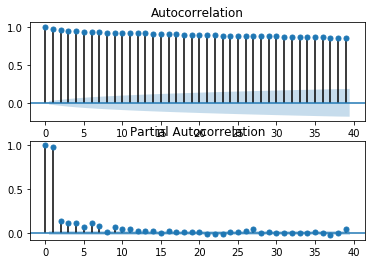

mean1=4.615471, mean2=5.412795
variance1=0.136717, variance2=0.190862


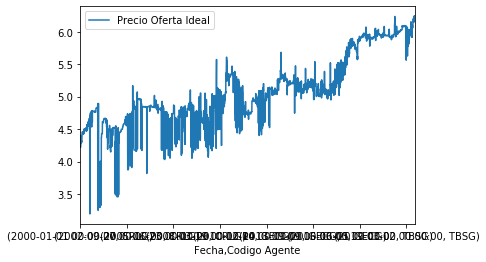

In [42]:
# TRANSFORMACION LOGARITMO PARA ESTABILIZAR VARIANZA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

M1TebsabLog=np.log(M1Tebsab)

pyplot.figure()
pyplot.subplot(211)
plot_acf(M1TebsabLog, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(M1TebsabLog, ax=pyplot.gca())
pyplot.show()

M1TebsabLog.plot()

X = M1TebsabLog['Precio Oferta Ideal'].values
split = len(X)/2
X1=X[0:3233]
X2=X[3233:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

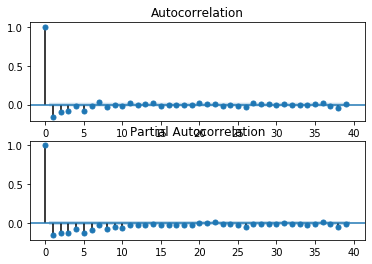

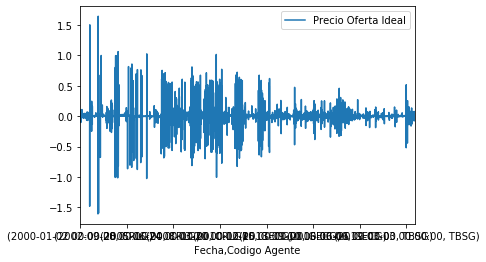

In [50]:
# PRIMERA DIFERENCIACIÓN PARA VOLVER ESTACIONAL
M1TebsabLogDif=M1TebsabLog.diff()
M1TebsabLogDif=M1TebsabLogDif[1:]

pyplot.figure()
pyplot.subplot(211)
plot_acf(M1TebsabLogDif, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(M1TebsabLogDif, ax=pyplot.gca())
pyplot.show()

M1TebsabLogDif.plot()

In [0]:
% pip install pyramid-arima
from pyramid.arima import auto_arima
stepwise_model = auto_arima(M1TebsabLogDif, start_p=0, start_q=0,
                           max_p=3, max_q=3, seasonal=False,
                           d=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

In [33]:
train = M1TebsabLogDif.iloc[:6465]
test = M1TebsabLogDif.iloc[6465:]

stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [0]:
future_forecast = stepwise_model.predict(n_periods=717)

future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

pd.concat([M1TebsabLogDif,future_forecast],axis=1).plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


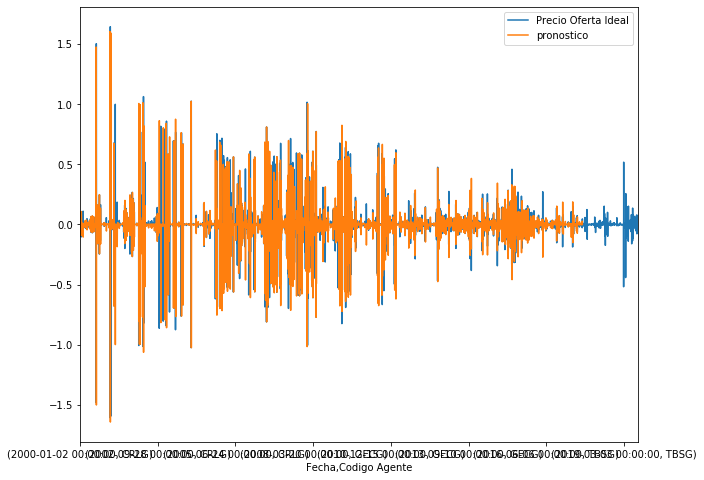

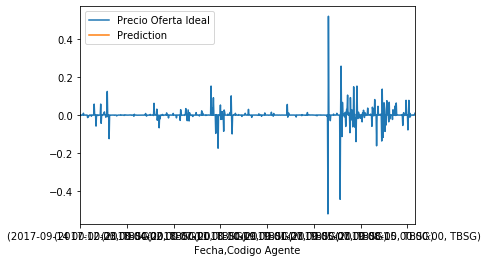

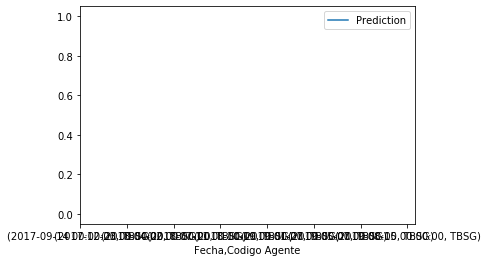

In [67]:
import statsmodels.api as sm
modelo = sm.tsa.ARIMA(train, order=(0, 1, 1))  
resultados = modelo.fit(disp=-1)  
M1TebsabLogDif['pronostico'] = resultados.fittedvalues  
plot = M1TebsabLogDif[['Precio Oferta Ideal', 'pronostico']].plot(figsize=(10, 8))

pred=resultados.predict(717)

pred = pd.DataFrame(pred,index = test.index,columns=['Prediction'])
pd.concat([test,pred],axis=1).plot()
pred.plot()